In [4]:
import pandas as pd

# Read dataset
df = pd.read_csv("Walmart.csv", parse_dates=["Date"])

# Show available columns
print("Available columns:", df.columns.tolist())

# Decide sort order based on available columns
sort_cols = []

if "Store" in df.columns:
    sort_cols.append("Store")
if "Dept" in df.columns:
    sort_cols.append("Dept")
if "Date" in df.columns:
    sort_cols.append("Date")

# Sort if any sort columns exist
if sort_cols:
    df.sort_values(sort_cols, inplace=True)
    print(f"Data sorted by: {sort_cols}")
else:
    print("⚠ No suitable columns found for sorting.")

# Check first few rows
print(df.head())


Available columns: ['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
Data sorted by: ['Store', 'Date']
     Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
60       1  01-04-2011    1495064.75             0        59.17       3.524   
121      1  01-06-2012    1624477.58             0        77.95       3.501   
73       1  01-07-2011    1488538.09             0        85.55       3.524   
34       1  01-10-2010    1453329.50             0        71.89       2.603   
108      1  02-03-2012    1688420.76             0        60.96       3.630   

            CPI  Unemployment  
60   214.837166         7.682  
121  221.747214         7.143  
73   215.184137         7.962  
34   211.671989         7.838  
108  220.848045         7.348  


In [5]:
print(df.info())
print(df.describe())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
Index: 6435 entries, 60 to 6339
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 452.5+ KB
None
             Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000 

01-04-2011 31-12-2010


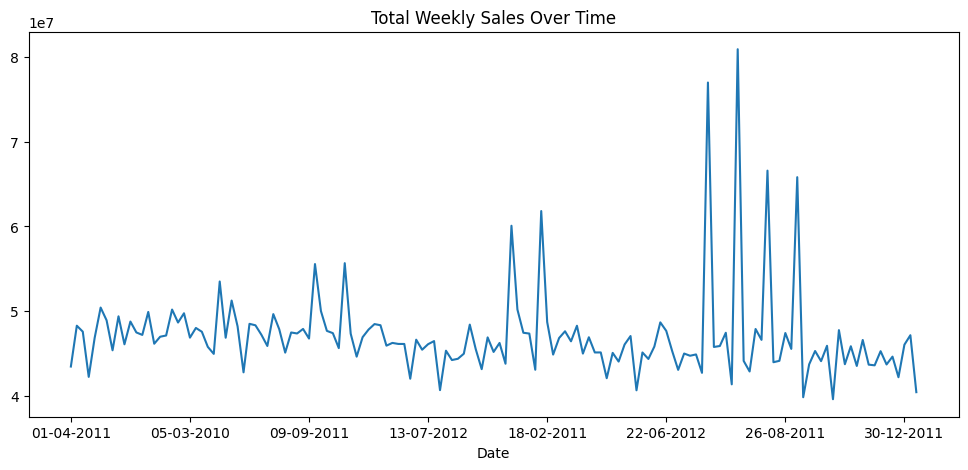

In [6]:
print(df["Date"].min(), df["Date"].max())

import matplotlib.pyplot as plt
df.groupby("Date")["Weekly_Sales"].sum().plot(figsize=(12,5))
plt.title("Total Weekly Sales Over Time")
plt.show()


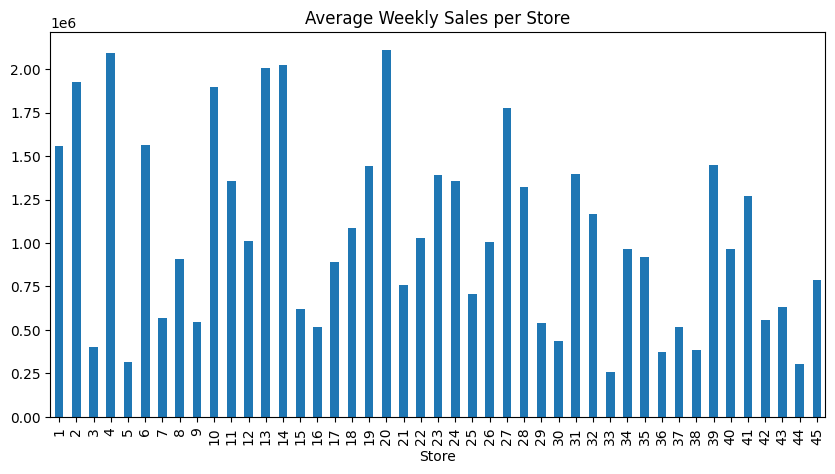

In [7]:
df.groupby("Store")["Weekly_Sales"].mean().plot(kind='bar', figsize=(10,5))
plt.title("Average Weekly Sales per Store")
plt.show()


In [12]:
df["Weekly_Sales"] = df.groupby("Store")["Weekly_Sales"].transform(lambda x: x.fillna(x.median()))


In [13]:
df["Date"] = pd.to_datetime(df["Date"], errors='coerce')


In [14]:
# Lag features create karo
df["Lag_1"] = df.groupby("Store")["Weekly_Sales"].shift(1)
df["Lag_2"] = df.groupby("Store")["Weekly_Sales"].shift(2)
df["Lag_3"] = df.groupby("Store")["Weekly_Sales"].shift(3)


In [15]:
# 3-week rolling average
df["Rolling_3"] = df.groupby("Store")["Weekly_Sales"].shift(1).rolling(window=3).mean()


In [16]:
df = df.dropna()


In [21]:
df.loc[:, "Date"] = pd.to_datetime(df["Date"])


In [23]:
# Agar tumne df filter kiya tha, toh pehle copy le lo
df = df.copy()

# Fir safe way se columns banao
df.loc[:, "Year"] = df["Date"].dt.year
df.loc[:, "Month"] = df["Date"].dt.month
df.loc[:, "Week"] = df["Date"].dt.isocalendar().week.astype(int)
df.loc[:, "Day"] = df["Date"].dt.day


In [24]:
train = df[df["Year"] < 2012].copy()
test = df[df["Year"] == 2012].copy()


In [25]:
df["Lag_1"] = df.groupby("Store")["Weekly_Sales"].shift(1)
df["Lag_2"] = df.groupby("Store")["Weekly_Sales"].shift(2)
df["Lag_3"] = df.groupby("Store")["Weekly_Sales"].shift(3)


In [26]:
df["Rolling_3"] = df.groupby("Store")["Weekly_Sales"].shift(1).rolling(3).mean()


In [27]:
df.dropna(inplace=True)


In [28]:
train = df[df["Year"] < 2012]
test = df[df["Year"] == 2012]

X_train = train[["Store", "Month", "Week", "Lag_1", "Lag_2", "Lag_3", "Rolling_3"]]
y_train = train["Weekly_Sales"]

X_test = test[["Store", "Month", "Week", "Lag_1", "Lag_2", "Lag_3", "Rolling_3"]]
y_test = test["Weekly_Sales"]


In [29]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [30]:
y_pred = model.predict(X_test)


In [31]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))


RMSE: 126686.99321760748
R² Score: 0.9483455873818496


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23024\3565898432.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Store", y="Weekly_Sales", data=df, estimator=sum, ci=None)


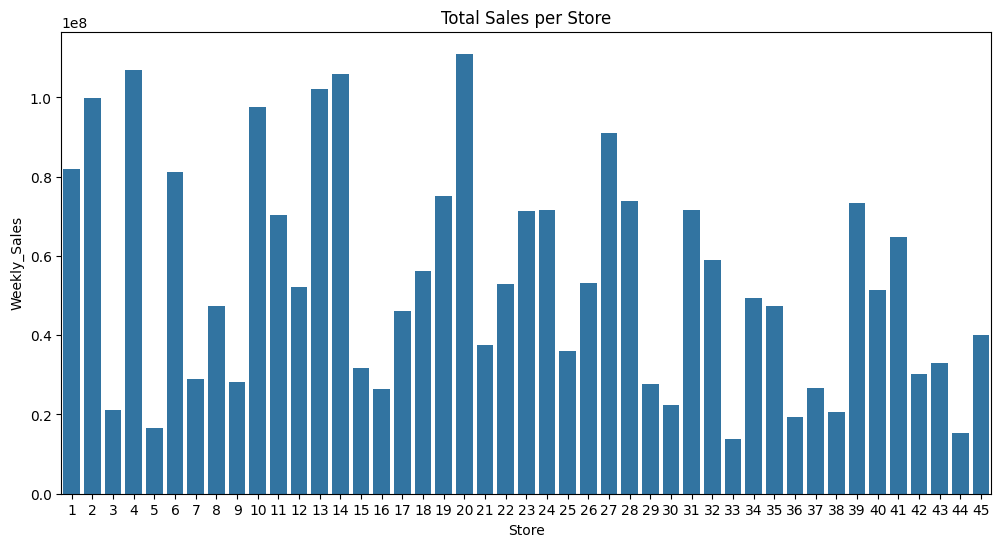

In [34]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(x="Store", y="Weekly_Sales", data=df, estimator=sum, ci=None)
plt.title("Total Sales per Store")
plt.show()


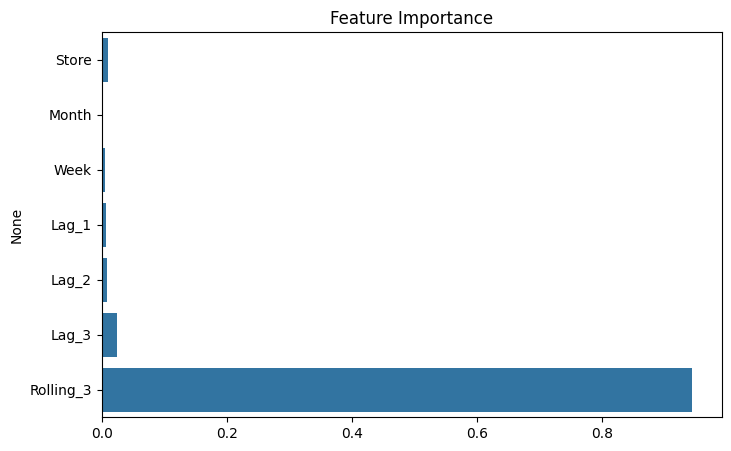

In [36]:
importances = model.feature_importances_
features = X_train.columns

plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.show()
